In [263]:
import os
import sys
import pandas as pd
import googletrans
from googletrans import Translator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [264]:
# Constants
ROOT_PATH = os.path.abspath(os.getcwd())
CALPI = "calpi"
SETTELMENT = "settelments"

In [265]:
def get_data(agg_type, num):
    """returns dataframe of the requested csv
    
    parameters
    ----------
    agg_type - aggregation type of the csv needed
    num - election number
    
    return
    ------
    DataFrame
    """
    if type(num) is not str:
        num = str(num)
    
    
    path = os.path.join(ROOT_PATH,num+agg_type+".xlsx")
    return pd.read_excel(path,dtype=object)

In [266]:
def remove_small_parties(df,threshold):
    """remove parties that didnt pass the threshold"""
    
    for column in df.columns[7:]:
            if df[column].sum() < threshold:
                   df = df.drop(column,axis=1)
    return df

In [267]:
def normalize_to_voting_ratios(df):
    """normalizing the votes according to proportion of votes per party"""
    
    for i,r in df.iterrows():
        for c in df.columns[7:]:
            x = r[c]/r['valid votes']
            df.at[i , c]=x

    return df

In [268]:
def prepare_voting_dataframe(df):
    """transpose the dataframe
    
    Makes cities as columns and voting proportion as observations.
    Removing extra metadata from dataframe.
    """
    city_names = df["name"].values
    colms_to_remove = df.columns[:7]
    
    
    df = df.drop(labels = colms_to_remove,axis=1)
    df = df.T
    df.columns = city_names
    return df
    
    

In [269]:
df = get_data(SETTELMENT,23)
df = remove_small_parties(df,135720)
df = normalize_to_voting_ratios(df)
df = prepare_voting_dataframe(df)

TypeError: '(slice(None, None, None), 0)' is an invalid key

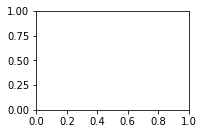

In [270]:
# Incorrect number of clusters
random_state = 170

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(df)

plt.subplot(221)
plt.scatter(df[:, 0], df[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")